# 4. Logistic regression

**Note**: contrary to the name,*regression* logistic is an algorithm used to solve *classification * problems (not * regression * problems!)

To demonstrate the method of ligistic regression, we will use the classical data set <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set" >*Iris flower data set*</a>, consisting of 150 examples of values of 4 characteristics for 3 species of irises (irises).

### *Iris flower data set*

* 150 examples
* 4 features
* 3 categories

4 features:
 * sepal length, `sl`
 * sepal width, `sw`
 * petal length, `pl`
 * petal width, `pw`

## 3.1. Two-class logistic regression

Let's start with the simplest case:
 * we limit ourselves to **2** classes
 * we limit ourselves to **1** variable

In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas
import ipywidgets as widgets

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.display import display, Math, Latex

# Useful functions

def h(theta, X):
    """Hypothesis (Matrix version)"""
    return X * theta

def regdots(X, y, xlabel, ylabel):
    """Data graph (Matrix version)"""
    fig = plt.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.scatter([X[:, 1]], [y], c='r', s=50, label='Data')
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.margins(.05, .05)
    plt.ylim(y.min() - 1, y.max() + 1)
    plt.xlim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)
    return fig

def regline(fig, fun, theta, X):
    """Regression curve graph (Matrix version)"""
    ax = fig.axes[0]
    x0 = np.min(X[:, 1]) - 1.0
    x1 = np.max(X[:, 1]) + 1.0
    L = [x0, x1]
    LX = np.matrix([1, x0, 1, x1]).reshape(2, 2)
    ax.plot(L, fun(theta, LX), linewidth='2',
            label=(r'$y={theta0:.2}{op}{theta1:.2}x$'.format(
                theta0=float(theta[0][0]),
                theta1=(float(theta[1][0]) if theta[1][0] >= 0 else float(-theta[1][0])),
                op='+' if theta[1][0] >= 0 else '-')))

def legend(fig):
    ax = fig.axes[0]
    handles, labels = ax.get_legend_handles_labels()
    # try-except block is a fix for a bug in Poly3DCollection
    try:
        fig.legend(handles, labels, fontsize='15', loc='lower right')
    except AttributeError:
        pass

def J(theta,X,y):
    """Matrix version of the loss function"""
    m = len(y)
    J = 1.0 / (2.0 * m) * ((X * theta - y).T * ( X * theta - y))
    return J.item()

def dJ(theta,X,y):
    """Cost function gradient Matrix version"""
    return 1.0 / len(y) * (X.T * (X * theta - y)) 

def GD(fJ, fdJ, theta, X, y, alpha=0.1, eps=10**-3):
    """Simple gradient algorithm implementation"""
    current_cost = fJ(theta, X, y)
    while True:
        theta = theta - alpha * fdJ(theta, X, y)
        current_cost, prev_cost = fJ(theta, X, y), current_cost
        if current_cost > 10000:
            break
        if abs(prev_cost - current_cost) <= eps:
            break
    return theta

theta_start = np.matrix([0, 0]).reshape(2, 1)

def threshold(fig, theta):
    """A function that draws a threshold"""
    x_thr = (0.5 - theta.item(0)) / theta.item(1)
    ax = fig.axes[0]
    ax.plot([x_thr, x_thr], [-1, 2],
            color='orange', linestyle='dashed',
            label=u'próg: $x={:.2F}$'.format(x_thr))

In [58]:
data_iris = pandas.read_csv("iris.csv")
data_iris = data_iris.rename(columns={"Gatunek":"Class"})
print(data_iris[:6])


    sl   sw   pl   pw            Class
0  5.2  3.4  1.4  0.2      Iris-setosa
1  5.1  3.7  1.5  0.4      Iris-setosa
2  6.7  3.1  5.6  2.4   Iris-virginica
3  6.5  3.2  5.1  2.0   Iris-virginica
4  4.9  2.5  4.5  1.7   Iris-virginica
5  6.0  2.7  5.1  1.6  Iris-versicolor


In [20]:
# Limit data to 2 classes and 1 feature

data_iris_setosa = pandas.DataFrame()
data_iris_setosa["pl"] = data_iris["pl"]  # petal length
data_iris_setosa["Iris setosa?"] = data_iris["Class"].apply(
    lambda x: 1 if x == "Iris-setosa" else 0
)
print(data_iris_setosa[:6])


    pl  Iris setosa?
0  1.4             1
1  1.5             1
2  5.6             0
3  5.1             0
4  4.5             0
5  5.1             0


In [21]:
import numpy as np

# Preparation of data
m, n_plus_1 = data_iris_setosa.values.shape
n = n_plus_1 - 1
Xn = data_iris_setosa.values[:, 0:n].reshape(m, n)

X = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n_plus_1)
y = np.matrix(data_iris_setosa.values[:, 1]).reshape(m, 1)

# Linear regression
theta_lin = GD(J, dJ, theta_start, X, y, alpha=0.03, eps=0.000001)


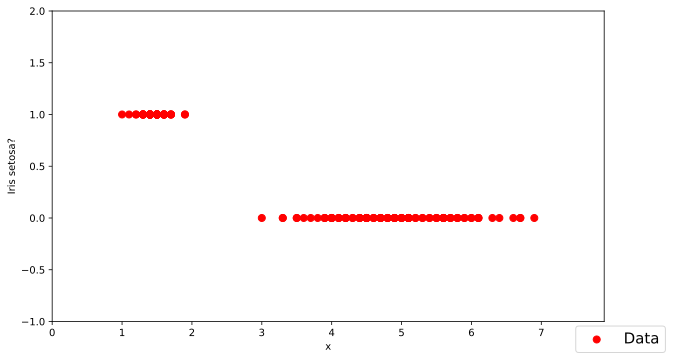

In [22]:
fig = regdots(X, y, "x", "Iris setosa?")
legend(fig)


#### Trying to apply linear regression to a classification problem

First, out of curiosity, let's see what we would get if we applied linear regression to the classification problem.

/tmp/ipykernel_998/2405949530.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta0=float(theta[0][0]),
/tmp/ipykernel_998/2405949530.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta1=(float(theta[1][0]) if theta[1][0] >= 0 else float(-theta[1][0])),


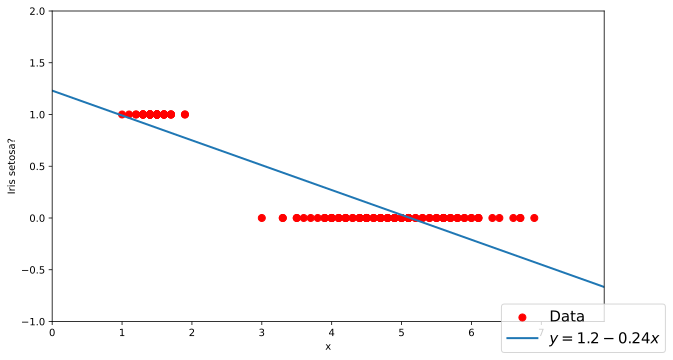

In [25]:
fig = regdots(X, y, "x", "Iris setosa?")
regline(fig, h, theta_lin, X)
legend(fig)


What if we assume that the classifier returns $1$ for $h (x) > 0.5$ and $0$ otherwise?

/tmp/ipykernel_998/2405949530.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta0=float(theta[0][0]),
/tmp/ipykernel_998/2405949530.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta1=(float(theta[1][0]) if theta[1][0] >= 0 else float(-theta[1][0])),


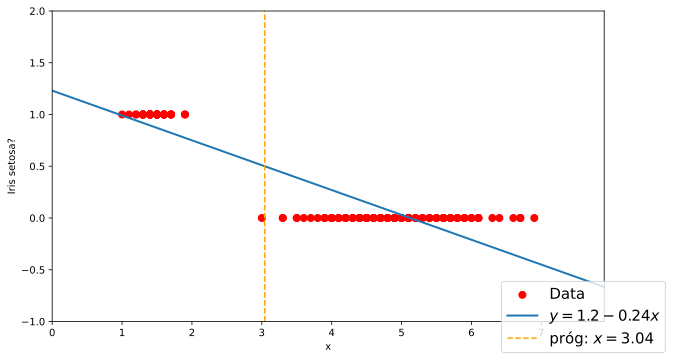

In [24]:
fig = regdots(X, y, "x", "Iris setosa?")
theta_lin = GD(J, dJ, theta_start, X, y, alpha=0.03, eps=0.000001)
regline(fig, h, theta_lin, X)
threshold(
    fig, theta_lin
)  # the Orange Line indicates the boundary between Class " 1 "and Class "0" defined by the threshold "h(x) = 0.5"
legend(fig)


* The linear regression curve is not very consistent with the classification data.
 * Applying the $y = 0.5 $ threshold does not always help to get a meaningful result.
 * $h (x)$ can take values less than $0$ and more than $1$ – How to interpret such results?

Conclusion: for classification problems, linear regression does not seem to be the best solution.

Let's make some changes to our model.

Let's define the following function, which we will call the *logistic* (or *sigmoid*)function:

**Logistic function (sigmoid)**:

$$g(x) = \dfrac{1}{1+e^{-x}}$$

In [26]:
def logistic(x):
    """Logistics function"""
    return 1.0 / (1.0 + np.exp(-x))


In [28]:
import matplotlib.pyplot as plt


def plot_logistic():
    """Logistic function graph"""
    x = np.linspace(-5, 5, 200)
    y = logistic(x)
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(111)
    plt.ylim(-0.1, 1.1)
    ax.plot(x, y, linewidth="2")


Logistic graph $g (x) = \dfrac{1}{1+e^{- x}}$:

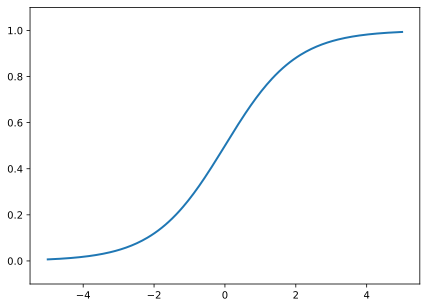

In [29]:
plot_logistic()


The logistic function transforms the set of real numbers $\mathbb{R}$ into an open range $(0, 1)$.

Logistic regression function for a single example with features expressed by vector $x$:

$$h_\theta (x) = g (\theta^T \, x) = \dfrac{1}{1 + e^{-\theta^T x}}$$

For the entire feature matrix $X$:

$$h_\theta(X) = g(X \, \theta) = \dfrac{1}{1 + e^{-X \theta}}$$

In [30]:
def h(theta, X):
    """Logistic regression function"""
    return 1.0 / (1.0 + np.exp(-X * theta))


Cost function for logistic regression:

$$J(\theta) = -\dfrac{1}{m} \left( \sum_{i=1}^{m} y^{(i)} \log h_\theta( x^{(i)} ) + \left( 1 - y^{(i)} \right) \log \left( 1 - h_\theta (x^{(i)}) \right) \right)$$

Gradient for logistic regression (Matrix version):

$$\nabla J(\theta) = \frac{1}{|\vec y|} X^T \left( h_\theta(X) - \vec y \right)$$

(The only difference between the gradient for logistic regression and the gradient for linear regression is $h_\theta$).

In [31]:
def J(h, theta, X, y):
    """Cost function for logistic regression"""
    m = len(y)
    h_val = h(theta, X)
    s1 = np.multiply(y, np.log(h_val))
    s2 = np.multiply((1 - y), np.log(1 - h_val))
    return -np.sum(s1 + s2, axis=0) / m


In [32]:
def dJ(h, theta, X, y):
    """Gradient for logistic regression"""
    return 1.0 / len(y) * (X.T * (h(theta, X) - y))


In [34]:
def GD(h, fJ, fdJ, theta, X, y, alpha=0.01, eps=10**-3, max_steps=10000):
    """Simple gradient method for logistic regression"""
    curr_cost = fJ(h, theta, X, y)
    history = [[curr_cost, theta]]
    while True:
        # calculate the new theta
        theta = theta - alpha * fdJ(h, theta, X, y)
        # report the cost rate
        prev_cost = curr_cost
        curr_cost = fJ(h, theta, X, y)
        # stop criteria
        if abs(prev_cost - curr_cost) <= eps:
            break
        if len(history) > max_steps:
            break
        history.append([curr_cost, theta])
    return theta, history


In [36]:
# Launch of the simple gradient method for logistic regression
theta_best, history = GD(
    h, J, dJ, theta_start, X, y, alpha=0.1, eps=10**-7, max_steps=1000
)
print(f"Loss: {history[-1][0]}")
print(f"theta = {theta_best}")


Loss: [[0.05755617]]
theta = [[ 5.02530461]
 [-1.99174803]]


In [37]:
def scalar_logistic_regression_function(theta, x):
    """Logistic regression function (scalar version)"""
    return 1.0 / (1.0 + np.exp(-(theta.item(0) + theta.item(1) * x)))


def threshold_val(fig, x_thr):
    """Drawing a threshold"""
    ax = fig.axes[0]
    ax.plot(
        [x_thr, x_thr],
        [-1, 2],
        color="orange",
        linestyle="dashed",
        label="próg: $x={:.2F}$".format(x_thr),
    )


def logistic_regline(fig, theta, X):
    """Logistic regression curve graph"""
    ax = fig.axes[0]
    x0 = np.min(X[:, 1]) - 1.0
    x1 = np.max(X[:, 1]) + 1.0
    Arg = np.arange(x0, x1, 0.1)
    Val = scalar_logistic_regression_function(theta, Arg)
    ax.plot(Arg, Val, linewidth="2")


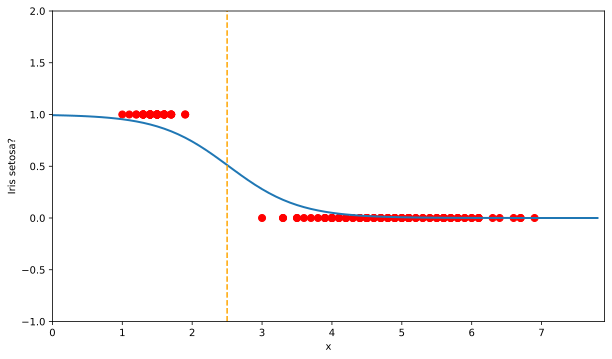

In [83]:
fig = regdots(X, y, xlabel="x", ylabel="Iris setosa?")
logistic_regline(fig, theta_best, X)
threshold_val(fig, 2.5)


We treat $h_\theta (x)$ as a probability defined as follows:

$$ h_\theta (x) = P (y = 1 \,|\, x; \theta) $$

If $h_\theta (x) > 0.5$, then for such $x$ we will predict the value of $y = 1$.
Otherwise, $y = $ 0.

Why can we treat the value of the logistic regression function as a probability?

You can read about it in external sources, for example. https://towardsdatascience.com/logit-of-logistic-regression-understanding-the-fundamentals-f384152a33d1

### Two-class logistic regression: more features

Jak postąpić, jeżeli będziemy mieli więcej niż jedną cechę $x$?

Weźmy teraz wszystkie cechy występujące w zbiorze *Iris*:
 * sepal length, `sl`
 * sepal width, `sw`
 * petal length, `pl`
 * petal width, `pw`)

In [38]:
data_iris_setosa_multi = pandas.DataFrame()
for feature in ["pl", "pw", "sl", "sw"]:
    data_iris_setosa_multi[feature] = data_iris[feature]
data_iris_setosa_multi["Iris setosa?"] = data_iris["Gatunek"].apply(
    lambda x: 1 if x == "Iris-setosa" else 0
)
print(data_iris_setosa_multi[:6])


    pl   pw   sl   sw  Iris setosa?
0  1.4  0.2  5.2  3.4             1
1  1.5  0.4  5.1  3.7             1
2  5.6  2.4  6.7  3.1             0
3  5.1  2.0  6.5  3.2             0
4  4.5  1.7  4.9  2.5             0
5  5.1  1.6  6.0  2.7             0


In [40]:
# Preparation of data
m, n_plus_1 = data_iris_setosa_multi.values.shape
n = n_plus_1 - 1
Xn = data_iris_setosa_multi.values[:, 0:n].reshape(m, n)

X = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n_plus_1)
y = np.matrix(data_iris_setosa_multi.values[:, n]).reshape(m, 1)

print(X[:6])
print()
print(y[:6])


[[1.  1.4 0.2 5.2 3.4]
 [1.  1.5 0.4 5.1 3.7]
 [1.  5.6 2.4 6.7 3.1]
 [1.  5.1 2.  6.5 3.2]
 [1.  4.5 1.7 4.9 2.5]
 [1.  5.1 1.6 6.  2.7]]

[[1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [51]:
# Przygotowanie danych
XTrain, XTest = X[:100], X[100:]
yTrain, yTest = y[:100], y[100:]

# Initial parameter Matrix
theta_start = np.ones(5).reshape(5, 1)


In [52]:
theta_best, history = GD(
    h, J, dJ, theta_start, XTrain, yTrain, alpha=0.1, eps=10**-7, max_steps=1000
)
print(f"Loss: {history[-1][0]}")
print(f"theta = {theta_best}")


Loss: [[0.006797]]
theta = [[ 1.11414027]
 [-2.89324615]
 [-0.66543637]
 [ 0.14887292]
 [ 2.13284493]]


### Decision function of logistic regression

The decision function tells us when our algorithm will predict $y = 1$, and when $y = 0$:

$$ c(x) := \left\{ 
\begin{array}{ll}
1, & \mbox{when } P(y=1 \, | \, x; \theta) > 0.5 \\
0 & \mbox{otherwise}
\end{array}\right.
$$

$$ P(y=1 \,| \, x; \theta) = h_\theta(x) $$

In [53]:
def classifyBi(theta, X):
    """Logistic regression decision function"""
    prob = h(theta, X).item()
    return (1, prob) if prob > 0.5 else (0, prob)


print(f"theta = {theta_best}")
print(f"x0 = {XTest[0]}")
print(f"h(x0) = {h(theta_best, XTest[0]).item()}")
print(f"c(x0) = {classifyBi(theta_best, XTest[0])}")


theta = [[ 1.11414027]
 [-2.89324615]
 [-0.66543637]
 [ 0.14887292]
 [ 2.13284493]]
x0 = [[1.  6.3 1.8 7.3 2.9]]
h(x0) = 1.606143695982487e-05
c(x0) = (0, 1.606143695982487e-05)


Let's now calculate the effectiveness of the model (more on this in the next jupyter notebook, devoted to evaluation methods).

In [49]:
correct = 0
for i, rest in enumerate(yTest):
    cls, prob = classifyBi(theta_best, XTest[i])
    if i < 10:
        print(f"{yTest[i].item():1.0f} <=> {cls} -- prob: {prob:6.4f}")
    correct += cls == yTest[i].item()
accuracy = correct / len(XTest)

print(f"\nAccuracy: {accuracy}")


0 <=> 0 -- prob: 0.0000
1 <=> 1 -- prob: 0.9816
0 <=> 0 -- prob: 0.0001
0 <=> 0 -- prob: 0.0005
0 <=> 0 -- prob: 0.0001
1 <=> 1 -- prob: 0.9936
0 <=> 0 -- prob: 0.0059
0 <=> 0 -- prob: 0.0992
0 <=> 0 -- prob: 0.0001
0 <=> 0 -- prob: 0.0001

Accuracy: 1.0


## 3.2. Multi-class logistic regression

Example: all features from the set *Iris*, all 3 classes from the set *Iris*.

In [59]:
import pandas

data_iris = pandas.read_csv("iris.csv")
data_iris = data_iris.rename(columns={"Gatunek":"Class"})
data_iris[:6]


,sl,sw,pl,pw,Class
0,5.2,3.4,1.4,0.2,Iris-setosa
1,5.1,3.7,1.5,0.4,Iris-setosa
2,6.7,3.1,5.6,2.4,Iris-virginica
3,6.5,3.2,5.1,2.0,Iris-virginica
4,4.9,2.5,4.5,1.7,Iris-virginica
5,6.0,2.7,5.1,1.6,Iris-versicolor


In [60]:
# Preparation of data

import numpy as np

features = ["sl", "sw", "pl", "pw"]
m = len(data_iris)
X = np.matrix(data_iris[features])
X0 = np.ones(m).reshape(m, 1)
X = np.hstack((X0, X))
y = np.matrix(data_iris[["Class"]]).reshape(m, 1)

print("X = ", X[:4])
print("y = ", y[:4])


X =  [[1.  5.2 3.4 1.4 0.2]
 [1.  5.1 3.7 1.5 0.4]
 [1.  6.7 3.1 5.6 2.4]
 [1.  6.5 3.2 5.1 2. ]]
y =  [['Iris-setosa']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-virginica']]


Let's replace the text labels in the $y$ array with *one-hot vectors*:

$$
\begin{array}{ccc}
\mbox{"Iris-setosa"}     & \mapsto & \left[ \begin{array}{ccc} 1 & 0 & 0 \\ \end{array} \right] \\
\mbox{"Iris-virginica"}  & \mapsto & \left[ \begin{array}{ccc} 0 & 1 & 0 \\ \end{array} \right] \\
\mbox{"Iris-versicolor"} & \mapsto & \left[ \begin{array}{ccc} 0 & 0 & 1 \\ \end{array} \right] \\
\end{array}
$$

Then, instead of the vector $y$, we get the Matrix $Y$:

$$
y \; = \;
\left[
\begin{array}{c}
y^{(1)}     \\
y^{(2)}     \\
y^{(3)}     \\
y^{(4)}     \\
y^{(5)}     \\
\vdots      \\
\end{array}
\right]
\; = \;
\left[
\begin{array}{c}
\mbox{"Iris-setosa"}     \\
\mbox{"Iris-setosa"}     \\
\mbox{"Iris-virginica"}  \\
\mbox{"Iris-versicolor"} \\
\mbox{"Iris-virginica"}  \\
\vdots                   \\
\end{array}
\right]
\quad \mapsto \quad
Y \; = \;
\left[
\begin{array}{ccc}
1 & 0 & 0 \\
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
0 & 1 & 0 \\
\vdots & \vdots & \vdots \\
\end{array}
\right]
$$

In [61]:
def mapY(y, cls):
    m = len(y)
    yBi = np.matrix(np.zeros(m)).reshape(m, 1)
    yBi[y == cls] = 1.0
    return yBi


def indicatorMatrix(y):
    classes = np.unique(y.tolist())
    m = len(y)
    k = len(classes)
    Y = np.matrix(np.zeros((m, k)))
    for i, cls in enumerate(classes):
        Y[:, i] = mapY(y, cls)
    return Y


# Unit Matrix
Y = indicatorMatrix(y)


In [64]:
# Division of data into training and test set
XTrain, XTest = X[:100], X[100:]
YTrain, YTest = Y[:100], Y[100:]

# Matrix of initial parameters-let it consist of only ones
theta_start = np.ones(5).reshape(5, 1)


Logistic regression is a method of solving two-class classification problems.

To find a solution to a multi-class classification problem using logistic regression, you need to transform the problem into a set of two-class classification problems.

Alternatively, you can use **polynomial logistic regression** (see https://machinelearningmastery.com/multinomial-logistic-regression-with-python).

### From two-class to multi-class logistical regression

* Irises are divided into three classes: _Iris-setosa_ (0), _Iris-versicolor_ (1), _Iris-virginica_ (2).
* We know how to create two-class classifiers of type _Iris-setosa_ vs. _no-Iris-setosa_ (so-called *one-vs-all*).
* We can create three classifiers $h_{\theta_1}, h_{\theta_2}, h_{\theta_3}$ (getting three sets of parameters $\theta$) and choose the class with the highest probability.

The *softmax* function, which is a generalization of the logistics function to a larger number of dimensions, will help us in this.

### Function _softmax_

The equivalent of the logistic function for multi-class logistic regression is the function $\mathrm{softmax}$:

$$ \textrm{softmax} \colon \mathbb{R}^k \to [0,1]^k $$

$$ \textrm{softmax}(z_1,z_2,\dots,z_k) = \left( \dfrac{e^{z_1}}{\sum_{i=1}^{k}e^{z_i}}, \dfrac{e^{z_2}}{\sum_{i=1}^{k}e^{z_i}}, \ldots, \dfrac{e^{z_k}}{\sum_{i=1}^{k}e^{z_i}} \right) $$

$$ \textrm{softmax}( \left[ \begin{array}{c} \theta_1^T x \\ \theta_2^T x \\ \vdots \\ \theta_k^T x \end{array} \right] ) = \left[ \begin{array}{c} P(y=1 \, | \, x;\theta_1,\ldots,\theta_k) \\ P(y=2 \, | \, x;\theta_1,\ldots,\theta_k) \\ \vdots \\ P(y=k \, | \, x;\theta_1,\ldots,\theta_k) \end{array} \right] $$

In [65]:
def softmax(X):
    """Softmax function (Matrix version)"""
    return np.exp(X) / np.sum(np.exp(X))


The values of $\mathrm{softmax}$ sum to 1:

In [66]:
Z = np.matrix([[2.1, 0.5, 0.8, 0.9, 3.2]])
P = softmax(Z)
print(np.sum(P))


0.9999999999999999


In [68]:
def multiple_binary_classifiers(X, Y):
    n = X.shape[1]
    thetas = []
    # For each class, let's train a separate two-class classifier.
    for c in range(Y.shape[1]):
        YBi = Y[:, c]
        theta = np.matrix(np.random.random(n)).reshape(n, 1)
        # Matrix of theta parameters calculated for each class separately.
        theta_best, history = GD(h, J, dJ, theta, X, YBi, alpha=0.1, eps=10**-4)
        thetas.append(theta_best)
    return thetas


In [70]:
# Theta matrices for each class
thetas = multiple_binary_classifiers(XTrain, YTrain)
for c, theta in enumerate(thetas):
    print(f"The resulting matrix of theta parameters for the class {c}:\n", theta, "\n")


The resulting matrix of theta parameters for the class 0:
 [[ 1.08171765]
 [ 0.06654684]
 [ 1.40232948]
 [-1.90272003]
 [-0.78054527]] 

The resulting matrix of theta parameters for the class 1:
 [[ 0.49426737]
 [ 0.19926109]
 [-1.09369163]
 [ 0.46570596]
 [-0.60235142]] 

The resulting matrix of theta parameters for the class 2:
 [[-0.84477845]
 [-1.52564809]
 [-1.68272695]
 [ 2.14112654]
 [ 2.8663136 ]] 



### Funkcja decyzyjna wieloklasowej regresji logistycznej

$$ c = \mathop{\textrm{arg}\,\textrm{max}}_{i \in \{1, \ldots ,k\}} P(y=i|x;\theta_1,\ldots,\theta_k) $$

In [65]:
def classify(thetas, X, debug=False):
    regs = np.array([(X * theta).item() for theta in thetas])
    if debug:
        print("Po zastosowaniu regresji: ", regs)
    probs = softmax(regs)
    if debug:
        print("Otrzymane prawdopodobieństwa: ", np.around(probs, decimals=3))
    result = np.argmax(probs)
    if debug:
        print("Wybrana klasa: ", result)
    return result


In [66]:
for i in range(4):
    print(f"Dla x = {XTest[i]}:")
    YPredicted = classify(thetas, XTest[i], debug=True)
    print(f"Obliczone y = {YPredicted}")
    print(f"Oczekiwane y = {np.argmax(YTest[i])}")
    print() 


Dla x = [[1.  7.3 2.9 6.3 1.8]]:
Po zastosowaniu regresji:  [-7.63785553  0.69049865  1.9308443 ]
Otrzymane prawdopodobieństwa:  [0.    0.224 0.776]
Wybrana klasa:  2
Obliczone y = 2
Oczekiwane y = 2

Dla x = [[1.  4.8 3.  1.4 0.3]]:
Po zastosowaniu regresji:  [ 2.73077944 -1.40205845 -9.52474181]
Otrzymane prawdopodobieństwa:  [0.984 0.016 0.   ]
Wybrana klasa:  0
Obliczone y = 0
Oczekiwane y = 0

Dla x = [[1.  7.1 3.  5.9 2.1]]:
Po zastosowaniu regresji:  [-6.9835945   0.12960859  1.9707454 ]
Otrzymane prawdopodobieństwa:  [0.    0.137 0.863]
Wybrana klasa:  2
Obliczone y = 2
Oczekiwane y = 2

Dla x = [[1.  5.9 3.  5.1 1.8]]:
Po zastosowaniu regresji:  [-5.5576559  -0.30458258  1.13931121]
Otrzymane prawdopodobieństwa:  [0.001 0.191 0.808]
Wybrana klasa:  2
Obliczone y = 2
Oczekiwane y = 2

